In [2]:
import torch
import torch.nn as nn
from torch.utils.data import random_split,Dataset, DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F
import math
from sklearn.model_selection import ParameterGrid

In [3]:
x = torch.linspace(-math.pi,math.pi,2000)
y = torch.sin(x)

In [4]:
x_train = x.reshape(-1,1)
y_train = torch.reshape(y,(-1,1))

In [5]:
class PolynomialDataset(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self,idx):
        return self.x[idx], self.y[idx]
   

In [95]:
train_set, test_set, val_set = random_split(PolynomialDataset(x_train,y_train),[1000,500,500])
test_loader = DataLoader(test_set,batch_size=32,shuffle=True)
val_loader = DataLoader(val_set,batch_size=32,shuffle=True)

In [96]:
class SimpleANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(1,5)
        self.l2 = nn.Linear(5,8)
        self.l3 = nn.Linear(8,5)
        self.l4 = nn.Linear(5,1)
    
    def forward(self,x):
        h1 = self.l1(x)
        ho1 = F.relu(h1)
        h2 = self.l2(ho1)
        ho2 = F.sigmoid(h2)
        h3 = self.l3(ho2)
        ho3 = F.tanh(h3)
        h4 = self.l4(ho3)

        return h4

model = SimpleANN()
print(model)


SimpleANN(
  (l1): Linear(in_features=1, out_features=5, bias=True)
  (l2): Linear(in_features=5, out_features=8, bias=True)
  (l3): Linear(in_features=8, out_features=5, bias=True)
  (l4): Linear(in_features=5, out_features=1, bias=True)
)


In [106]:
param_grid = {
    'learning-rate': [(10e-02)],
    'batch_size': [64,32],
    'epochs': [10,40],
    'optimizer': [torch.optim.SGD,torch.optim.Adam]
}

In [111]:
for params in ParameterGrid(param_grid):
    train_loader = DataLoader(train_set,batch_size=params['batch_size'],shuffle=True)
    model = SimpleANN()
    optimizer = params['optimizer'](model.parameters(),params['learning-rate'])
    criterion = nn.MSELoss()

    losses = []
    for epoch in range(params['epochs']):
        for batch_idx,(inputs,targets) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(inputs)
            loss = criterion(targets,output)
            loss.backward()
            optimizer.step()

            model.eval()
            with torch.no_grad():
                validation_loss = 0.0
                for val_batch_idx, (val_inputs,val_targets) in enumerate(val_loader):
                    val_outputs = model(val_inputs)
                    val_loss = criterion(val_targets,val_outputs)
                    validation_loss+=val_loss.item()
                
                avg_val_loss = validation_loss/len(val_loader)
        
    print(f'Epoch {epoch + 1}/{100}, Validation Loss:{avg_val_loss:.4f}')
        
    print(f"Epoch {epoch + 1}/{100}, Batch {batch_idx + 1}/{len(train_loader)}, Loss: {loss.item():.4f}")      
        #losses.append(loss.item())

Epoch 10/100, Validation Loss:0.0982
Epoch 10/100, Batch 16/16, Loss: 0.1010
Epoch 10/100, Validation Loss:0.0164
Epoch 10/100, Batch 16/16, Loss: 0.0076
Epoch 40/100, Validation Loss:0.0495
Epoch 40/100, Batch 16/16, Loss: 0.0525
Epoch 40/100, Validation Loss:0.0302
Epoch 40/100, Batch 16/16, Loss: 0.0158
Epoch 10/100, Validation Loss:0.0760
Epoch 10/100, Batch 32/32, Loss: 0.0453
Epoch 10/100, Validation Loss:0.0468
Epoch 10/100, Batch 32/32, Loss: 0.0345
Epoch 40/100, Validation Loss:0.0213
Epoch 40/100, Batch 32/32, Loss: 0.0237
Epoch 40/100, Validation Loss:0.0006
Epoch 40/100, Batch 32/32, Loss: 0.0018


<class 'numpy.ndarray'>
(2000, 1) <class 'numpy.ndarray'>


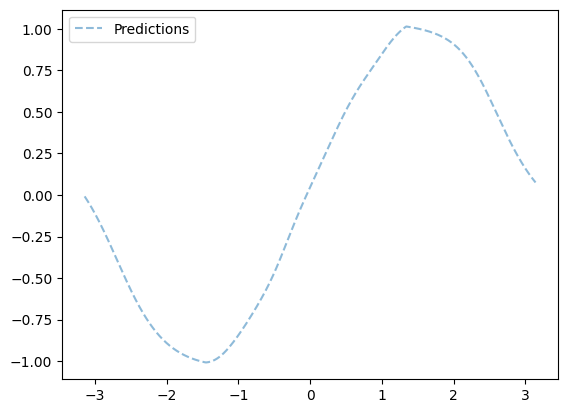

In [114]:
with torch.no_grad():
    predicted = model(x_train).data.numpy()
    print(type(predicted))
    print(predicted.shape, type(predicted))

    plt.clf()
    #plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
    plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
    plt.legend(loc='best')
    plt.show()

In [113]:
model.eval()
with torch.no_grad():
    test_loss = 0.0
    correct = 0
    total = 0

    for batch_idx,(inputs,targets) in enumerate(test_loader):
        outputs = model(inputs)
        loss = criterion(outputs,targets)
        test_loss +=loss.item()

        _,predicted = torch.max(outputs,1)
        total+=targets.size(0)
        correct+=(predicted==targets).sum().item()

    
    avg_test_loss = test_loss/len(test_loader)
    accuracy = correct/total
    print(correct)
    print(total)

    print(f'Test Loss: {avg_test_loss:.4f}, Accuracy: {accuracy:.4f}')


0
500
Test Loss: 0.0006, Accuracy: 0.0000


In [63]:
#Prediction
#Step 1: Predict the input
input_data = torch.tensor([1.0])

#Step 2: Set model to evaluation mode
model.eval()

#Step 3: Perform Prediction
with torch.no_grad():
    output = model(input_data)

#Step 4: Process the output
predicted_output = output.item()

#Step 5: Print or use predicted value
print(f'Predicted Value: {predicted_output:.4f}')

Predicted Value: 0.9435
